# Exploratory Data Analysis

#### Amazon Book Reviews DataFrame

I obtain a dataset of 8.9 million book reviews courtesy of Julian McAuley, UCSC. For the purposes of this notebook, we will examine only 15,000 rows.

http://jmcauley.ucsd.edu/data/amazon/

## Examine Data

In [114]:
# Import pandas and numpy
import pandas as pd

# Open DataFrame with 15,000 rows
df = pd.read_csv('Amazon_Data_Frame.csv', nrows=15000)

# View DataFrame
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,000100039X,"[0, 0]",5.0,Spiritually and mentally inspiring! A book tha...,"12 16, 2012",A10000012B7CGYKOMPQ4L,Adam,Wonderful!,1355616000
1,1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800
2,2,000100039X,"[0, 0]",5.0,This book provides a reflection that you can a...,"01 18, 2014",A1BM81XB4QHOA3,"Ahoro Blethends ""Seriously""",Must Read for Life Afficianados,1390003200
3,3,000100039X,"[0, 0]",5.0,I first read THE PROPHET in college back in th...,"09 27, 2011",A1MOSTXNIO5MPJ,Alan Krug,Timeless for every good and bad time in your l...,1317081600
4,4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800


In [115]:
# Delete extraneous column
del df['Unnamed: 0']

In [116]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
asin              15000 non-null object
helpful           15000 non-null object
overall           15000 non-null float64
reviewText        14998 non-null object
reviewTime        15000 non-null object
reviewerID        15000 non-null object
reviewerName      14998 non-null object
summary           14999 non-null object
unixReviewTime    15000 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


## Create New Columns

The following columns are created with the purpose of finding interesting and relevant numbers to determine a reviewer's Helpful Rating, primarily based on the percentage of helpful reviews and the total number of helpful reviews.

### Split Helpful Column

In [117]:
import numpy as np
import ast
# Convert 'helpful' column into list
myList = np.array(df.helpful.apply(lambda row: ast.literal_eval(row)).tolist())

# Separate list into distinct columns
df['Helpful_Votes'] = myList[:,0]
df['Total_Votes'] = myList[:,1]

### Add Helpful Percentage

In [118]:
# Create column for percentage of helpful votes, convert NaN values to 0.
df['Helpful_Percentage'] = (df['Helpful_Votes']/df['Total_Votes']).fillna(0)
# Check for error points any error points
df.loc[df['Helpful_Percentage']>1.0]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful_Votes,Total_Votes,Helpful_Percentage
1533,0002007770,"[2, 1]",3.0,I was surprised to find that Water for Elephan...,"03 5, 2009",A1FJC36TGXG20D,"Jessica Bender ""aglowgal""","Exciting, boring, then exciting again.",1236211200,2,1,2.0


#### Remove Error Point

In [119]:
df.drop(df.index[1533], inplace=True)

### Add More Columns

In [120]:
# Create column for unhelpful votes
df['Unhelpful_Votes'] = df['Total_Votes']-df['Helpful_Votes']

# Create column for helpful votes above expected helpful votes
helpfulPercentage = 0.7426197720523914
# helpfulPercentage is mean percentage of Helpful_Votes (previously computed) over entire 8.9 million row dataset
df['Helpful_Above_Mean'] = df['Helpful_Votes']-df['Total_Votes']*helpfulPercentage

# Create column for length of review
df['Review_Length'] = df['reviewText'].str.len()

# Create column that sums helpful votes
df['Helpful_Votes_User'] = df.groupby('reviewerID')['Helpful_Votes'].transform('sum')

# Create column that sums total votes
df['Total_Votes_User'] = df.groupby('reviewerID')['Total_Votes'].transform('sum')

# Create column for user's percentage of helpful votes
df['User_Helpful_Percentage']=(df['Helpful_Votes_User']/df['Total_Votes_User']).fillna(0)
# fillna(0) will convert NaN to 0 when totalVotes_User == 0

# Create column that sums unhelpful votes
df['Unhelpful_Votes_User'] = df.groupby('reviewerID')['Unhelpful_Votes'].transform('sum')

# Create column for user's helpful votes above expected helpful votes
df['Helpful_Above_Mean_User'] = df['Helpful_Votes_User']-df['Total_Votes_User']*helpfulPercentage

# Create column that sums total reviews per book 
df['Total_Reviews_Book'] = df.groupby('asin')['asin'].transform('count')

# Create column that sums helpful votes per book
df['Helpful_Votes_Book'] = df.groupby('asin')['Helpful_Votes'].transform('sum')

# Create column that sums total votes per book
df['Total_Votes_Book'] = df.groupby('asin')['Total_Votes'].transform('sum')

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful_Votes,Total_Votes,Helpful_Percentage,Unhelpful_Votes,Helpful_Above_Mean,Review_Length,Helpful_Votes_User,Total_Votes_User,User_Helpful_Percentage,Unhelpful_Votes_User,Helpful_Above_Mean_User,Total_Reviews_Book,Helpful_Votes_Book,Total_Votes_Book
0,000100039X,"[0, 0]",5.0,Spiritually and mentally inspiring! A book tha...,"12 16, 2012",A10000012B7CGYKOMPQ4L,Adam,Wonderful!,1355616000,0,0,0.000000,0,0.000000,129.0,0,0,0.0,0,0.000000,206,1006,1418
1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,0,2,0.000000,2,-1.485240,268.0,0,3,0.0,3,-2.227859,206,1006,1418
2,000100039X,"[0, 0]",5.0,This book provides a reflection that you can a...,"01 18, 2014",A1BM81XB4QHOA3,"Ahoro Blethends ""Seriously""",Must Read for Life Afficianados,1390003200,0,0,0.000000,0,0.000000,202.0,0,0,0.0,0,0.000000,206,1006,1418
3,000100039X,"[0, 0]",5.0,I first read THE PROPHET in college back in th...,"09 27, 2011",A1MOSTXNIO5MPJ,Alan Krug,Timeless for every good and bad time in your l...,1317081600,0,0,0.000000,0,0.000000,831.0,0,0,0.0,0,0.000000,206,1006,1418
4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,7,9,0.777778,2,0.316422,813.0,8,10,0.8,2,0.573802,206,1006,1418


### Helpful Rating

There is no single column in the data to measure how helpful a particular review is. Helpful votes is a leading candidate, followed by helpful percentage. These can be combined and scaled using other factors like how many helpful reviews the book has. Furthermore, it's important to measure against the mean.

The following equation takes these factors above into account with a final scale to convert all ratings between 0 and 100. Although imperfect, it provides a single number to measure the helpfulness of a given review.

In [121]:
df['Helpful_Rating']=100/(1+100*np.exp(-0.8*df['Helpful_Above_Mean']))-100/101

df['Helpful_Rating']=(df['Helpful_Percentage']*100 + df['Helpful_Rating'])/2

### Create DataFrame Where Total_Votes>0

In [122]:
# Reduced DataFrame only includes reviews with votes
df_sub = df[df['Total_Votes']!=0]

## Show Data

In [141]:
df_sub.describe()

,overall,unixReviewTime,Helpful_Votes,Total_Votes,Helpful_Percentage,Unhelpful_Votes,Helpful_Above_Mean,Review_Length,Helpful_Votes_User,Total_Votes_User,User_Helpful_Percentage,Unhelpful_Votes_User,Helpful_Above_Mean_User,Total_Reviews_Book,Helpful_Votes_Book,Total_Votes_Book,Helpful_Rating
count,10114.000000,1.011400e+04,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000
mean,4.069804,1.216714e+09,6.055171,8.752225,0.647438,2.697054,-0.444404,1008.675203,10.323809,13.996144,0.648307,3.672335,-0.070005,1115.118351,5084.213170,7908.023136,33.630741
std,1.236205,1.382944e+08,31.408958,35.041405,0.375791,6.796994,7.316033,1135.271245,46.045063,51.316703,0.362884,8.599429,9.862231,1093.785516,5610.077232,9557.413473,21.024445
min,1.000000,8.714304e+08,0.000000,1.000000,0.000000,0.000000,-130.523954,8.000000,0.000000,1.000000,0.000000,0.000000,-130.523954,5.000000,1.000000,1.000000,-0.495050
25%,3.000000,1.105855e+09,1.000000,1.000000,0.333333,0.000000,-0.911437,282.000000,1.000000,1.000000,0.384615,0.000000,-0.970479,77.000000,263.000000,328.000000,16.358145
50%,5.000000,1.233965e+09,2.000000,3.000000,0.770330,1.000000,0.257380,640.500000,2.000000,4.000000,0.753482,1.000000,0.257380,610.000000,2144.000000,2899.000000,38.976501
75%,5.000000,1.344470e+09,5.000000,8.000000,1.000000,2.000000,0.514760,1317.000000,7.000000,11.000000,1.000000,3.000000,0.514760,2054.000000,8096.000000,10339.000000,50.111812
max,5.000000,1.404950e+09,1515.000000,1581.000000,1.000000,210.000000,340.918140,17612.000000,1515.000000,1581.000000,1.000000,211.000000,340.918140,2720.000000,15208.000000,26552.000000,99.504950


## Display Histograms

### All Rows

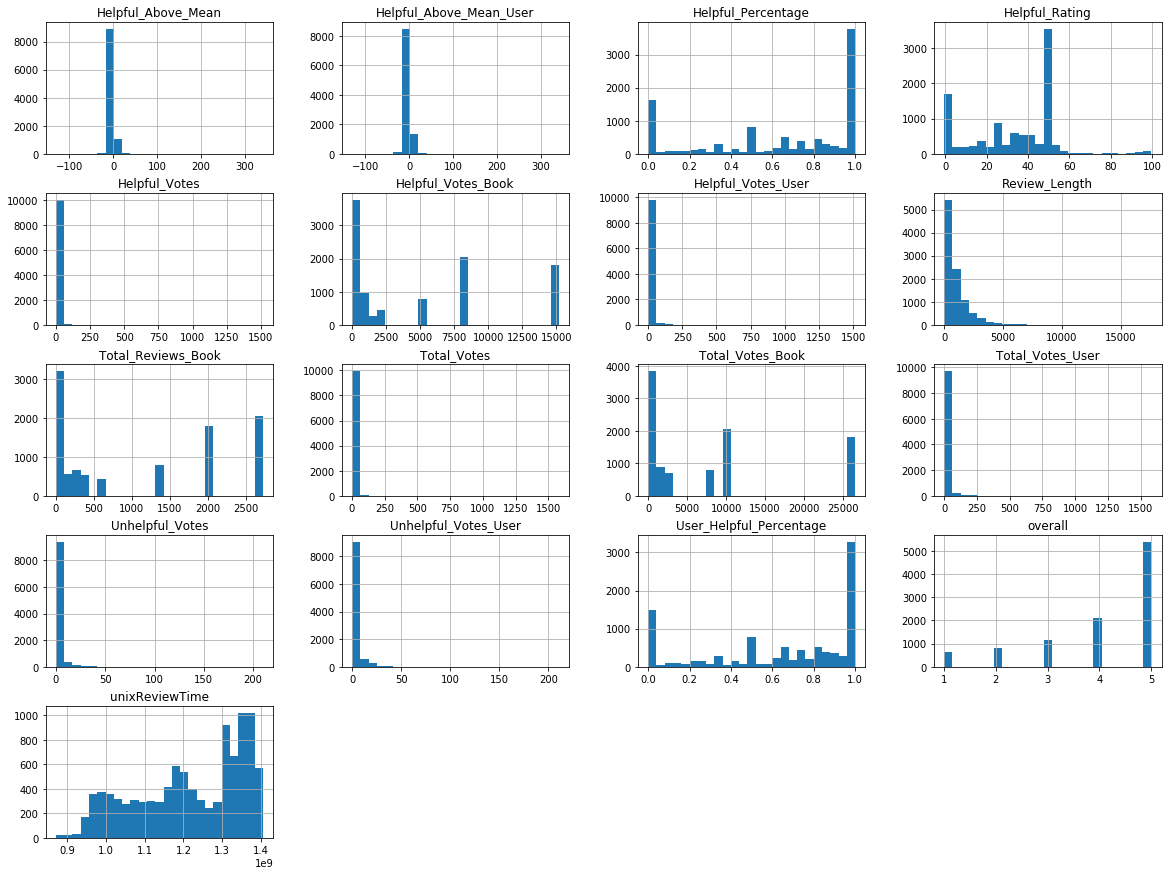

In [123]:
# Show plots inline
%matplotlib inline

#Import matplotlib
import matplotlib.pyplot as plt

# Create histograms for all numberical columns, set number of bins and size
df_sub.hist(bins=25, figsize=(20,15))

# Show plot
plt.show()


The plots are very uneven. Many are biased toward 0. The 'overall' histogram reveals a strongly left skewed graph. Same with 'unixReviewTime'. 'Review_Length is a nice that is strongly right skewed. 'Helpful_Percentage' is very U-shaped.

### Functions for EDA

In [124]:
# Scatter plot function takes in x-column, y-column, dataframe and alpha as paramters
def scatter(x_col, y_col, title, df, alpha):
    # Set x as the df x-column paramter
    x = df[x_col]
    # Set y as the df x-column paramter
    y = df[y_col]
    # Label x as x-column string parameter
    plt.xlabel(str(x_col))
    # Label y as y-column string parameter
    plt.ylabel(str(y_col))
    # Label title as title
    plt.title(title)
    # Create scatter plot with provided alpha
    plt.scatter(x,y,alpha=alpha)

In [ ]:
# Correlation function for two arrays
def correlation(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

## Helpful Votes / Total Votes

### Scatter Plot

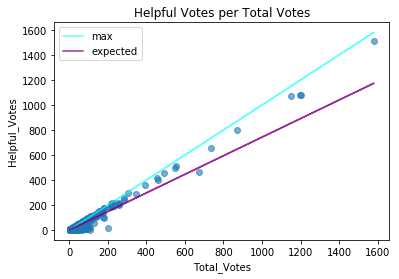

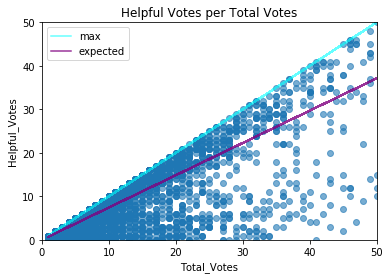

     Correlation: 0.9850063437820218 .


In [159]:
# MAIN PLOT

# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Total_Votes', 'Helpful_Votes', 'Helpful Votes per Total Votes', df_sub, 0.6)

# Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
maxLine, = plt.plot(x, x, 'cyan', label='max', alpha=0.6)

# The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, helpfulPercentage*x, 'purple', label='expected', alpha=0.8)

# Create legend
plt.legend(handles=[maxLine, expectedLine])

# Show plot
plt.show()

# ZOOM PLOT

# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Total_Votes', 'Helpful_Votes', 'Helpful Votes per Total Votes', df_sub, 0.6)

# Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
maxLine, = plt.plot(x, x, 'cyan', label='max', alpha=0.6)

# The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, helpfulPercentage*x, 'purple', label='expected', alpha=0.8)

# Create legend
plt.legend(handles=[maxLine, expectedLine])

# Set limits for x and y
plt.xlim(0,50)
plt.ylim(0,50)

# Show the plot
plt.show()

# CORRELATION
x = df_sub['Total_Votes']
y = df_sub['Helpful_Votes']
# compute correlation of x,y from above plot
coeff = correlation(x,y)
print('     Correlation:', coeff, '.')

The graphs show a clear linear relationship with strong clustering near the origin. The correlation between Total_Votes and Helpful_Votes is surprisingly high. This indicates

### Violin Plot

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


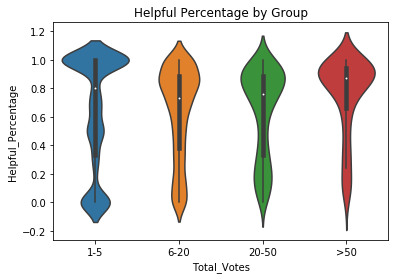

In [134]:
df_sub['label']='None'

# Label the column depending on number of Total_Votes.
df_sub.loc[df_sub['Total_Votes'] <= 5, 'label'] = "1-5"
df_sub.loc[(df_sub['Total_Votes'] > 5) & (df_sub['Total_Votes'] <= 20), 'label'] = "6-20"
df_sub.loc[(df_sub['Total_Votes'] > 20) & (df_sub['Total_Votes'] <= 50), 'label'] = "21-50"
df_sub.loc[df_sub['Total_Votes'] > 50, 'label'] = ">50"

# Create Violin Plot
import seaborn as sns
_ = sns.violinplot(x='label', y='Helpful_Percentage', data=df_sub, order=['1-5', '6-20', '20-50', '>50'])
_ = plt.xlabel('Total_Votes')
_ = plt.title('Helpful Percentage by Group')

Clearly, 1-5 reviews have the widest range. Then the violins thin on the bottom and thicken on top. This indicates that users are more likely to vote when they find a review helpful.

## Unhelpful Votes / Helpful Votes

### Scatter Plot

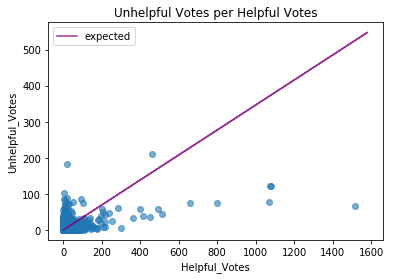

In [145]:
# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Helpful_Votes', 'Unhelpful_Votes', 'Unhelpful Votes per Helpful Votes', df_sub, 0.6)

# The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, x/helpfulPercentage-x, 'purple', label='expected', alpha=0.8)

# Create legend
plt.legend(handles=[expectedLine])

# Show plot
plt.show()

Many helpful votes result in a much lower percentage of unhelpful votes.

### Zoom in

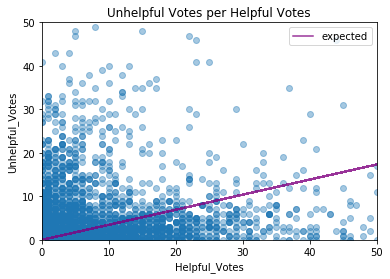

In [148]:
# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Helpful_Votes', 'Unhelpful_Votes', 'Unhelpful Votes per Helpful Votes', df_sub, 0.4)

# The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, x/helpfulPercentage-x, 'purple', label='expected', alpha=0.8)

# Create legend
plt.legend(handles=[expectedLine])

# Set x,y bounds
plt.xlim(0,50)
plt.ylim(0,50)

# Show plot
plt.show()

The data changes considerably the further one gets from the origin.

### Correlation

In [38]:
# compute correlation of x,y from above plot
x = df_sub['Helpful_Votes']
y = df_sub['Unhelpful_Votes']

coeff = correlation(x,y)
print('Correlation between Helpful Votes and Unhelpful Votes is', coeff, '.')

Correlation between Helpful Votes and Unhelpful Votes is 0.45712093817382793 .


Total votes is a much better predictor of helpful votes (correlation 0.9850059728807815) than helpful votes is of unhelpful votes.

## Review Length / Helpful Votes

### Scatter Plot

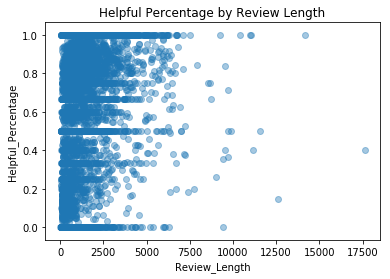

In [149]:
# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Review_Length', 'Helpful_Percentage', 'Helpful Percentage by Review Length', df_sub, 0.4)

# Show plot
plt.show()

The correlation looks very weak.

### Zoom in

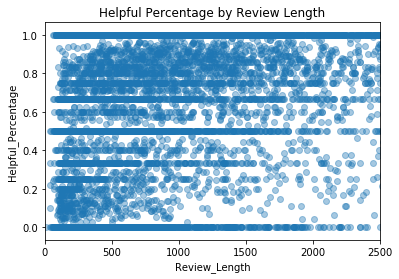

In [150]:
# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Review_Length', 'Helpful_Percentage', 'Helpful Percentage by Review Length', df_sub, 0.4)

# Limit x
plt.xlim(0,2500)

# Show plot
plt.show()

Low helpful percentages are less likely as the length of reviews goes up.

### Correlation

In [45]:
coeff = correlation(x,y)
print('Correlation between Helpful Percentage and Review Length is', coeff, '.')

Correlation between Helpful Percentage and Review Length is 0.1659256482028885 .
